# First Name: Christopher 
# Last Name: Caferra

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

# Import Data

In [2]:
bottle = pd.read_csv('bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# Data management 

In [3]:
bottle['Depthm'] = pd.to_numeric(bottle['Depthm']).dropna()
bottle['T_degC'] = pd.to_numeric(bottle['T_degC']).dropna()

In [4]:
sub1=bottle[(bottle['Depthm']>=0) & (bottle['Depthm']<=500)]
sub2=sub1.copy()

In [5]:
sub2['Depthm'] = pd.cut(sub2.Depthm, [0, 100, 200, 300, 400, 500])


In [6]:
sub2['Depthm'] = sub2['Depthm'].astype('category') 

# Box Plot

<IPython.core.display.Javascript object>


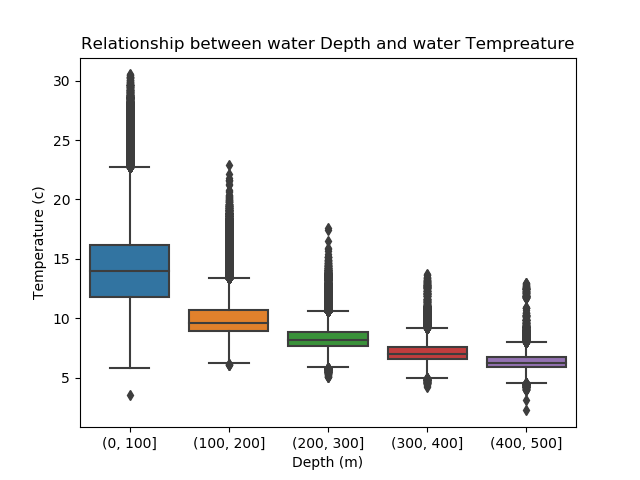

Text(0, 0.5, 'Temperature (c)')

In [7]:
%matplotlib notebook
sns.boxplot(x='Depthm', y='T_degC', data=sub2)
plt.title('Relationship between water Depth and water Tempreature')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature (c)')

# ANOVA

In [8]:
model1 = smf.ols(formula='T_degC ~ C(Depthm)', data=sub2).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 2.827e+05
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        22:16:40   Log-Likelihood:            -1.6635e+06
No. Observations:              730759   AIC:                         3.327e+06
Df Residuals:                  730754   BIC:                         3.327e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [9]:
sub3 = sub2[['Depthm', 'T_degC']].dropna()
m1= sub3.groupby('Depthm').mean()
print(m1)

              T_degC
Depthm              
(0, 100]   14.158273
(100, 200] 10.013205
(200, 300]  8.328004
(300, 400]  7.152152
(400, 500]  6.339775


In [10]:
sd1 = sub3.groupby('Depthm').std()
print(sd1)

             T_degC
Depthm             
(0, 100]   3.100458
(100, 200] 1.678879
(200, 300] 1.064779
(300, 400] 0.901834
(400, 500] 0.737018
